In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [2]:
data=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [3]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [6]:
data.shape

(200, 5)

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Text(0.5, 1.0, 'Scatterplot Between Annual Income(k$) and Spending Score')

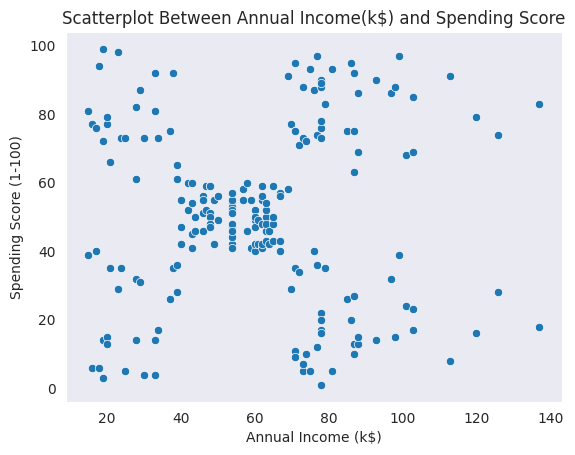

In [11]:
sns.set_style('dark')
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot Between Annual Income(k$) and Spending Score')


In [12]:
x=data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [13]:
scaler=MinMaxScaler().fit(x)

In [14]:
print(scaler)

MinMaxScaler()


In [15]:
scaler.feature_range

(0, 1)

In [16]:
scaler.transform(x)

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

In [17]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

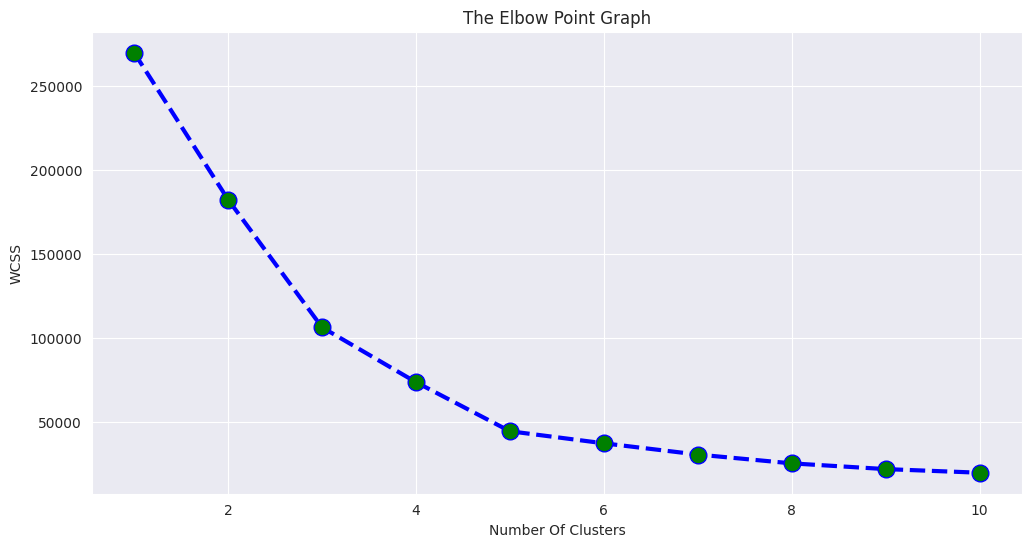

In [19]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, color='blue',linestyle='dashed',linewidth=3,marker='o',
         markerfacecolor='green',markersize=12)
plt.title('The Elbow Point Graph')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show

In [20]:
kmeans=KMeans(n_clusters=5,init='k-means++')
label=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 0 4 1 4 0 4 0 4 1 4 0 4 0 4 0 4 0 4 1 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


In [23]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]]


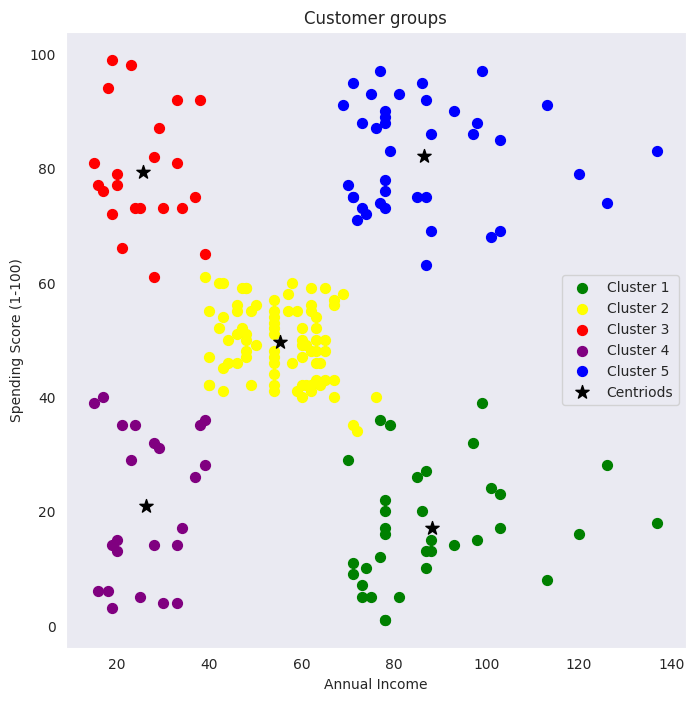

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(x[label==0,0],x[label==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(x[label == 1,0], x[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(x[label == 2,0], x[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(x[label == 3,0], x[label== 3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(x[label == 4,0], x[label== 4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Color purple: Low income earners with low spending score. This is because people with low income will tend to purchase less item at the store

Color red: Low income but high spending score. This might be because they enjoy and are satisfied with the services given at the retail store.

Color green: High income but low spending score. One of the reason might be that they are not satisfied with the services. These group of people should be targeted by the marketing team.

Color yellow: They have average income with average spending scores. They are cautious with their spending at the store.

Color blue: They have high income and high spending score as well. Frome this it can be assumed that they are satisfied with the services provided by the store. They bring in profit.Discounts and offers targeted at this group will increase their spending score ad maximize profit.